<a href="https://colab.research.google.com/github/adw1029/CSCI_544/blob/main/test_final_results_gender_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.9 MB/s eta 0:00:00


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import os
import pandas as pd
import librosa
import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
google_drive_directory = '/content/drive/My Drive/'
os.chdir(google_drive_directory)

In [ ]:
from keras import regularizers

In [ ]:
import os

In [ ]:
raw_data_path = '/content/drive/My Drive/RawData/'
mylist = os.listdir(raw_data_path)

In [ ]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content/drive/My Drive


In [ ]:
mylist = os.listdir(raw_data_path)

In [ ]:
print(mylist)
print(len(mylist))

['02-01-03-02-02-01-16.mp4', '02-01-04-01-02-01-16.mp4', '02-01-04-01-02-02-16.mp4', '02-01-04-01-01-02-16.mp4', '02-01-04-02-01-01-16.mp4', '02-01-04-02-02-02-16.mp4', '02-01-04-02-02-01-16.mp4', '02-01-04-02-01-02-16.mp4', '02-01-05-01-01-01-16.mp4', '02-01-05-01-02-01-16.mp4', '02-01-05-01-01-02-16.mp4', '02-01-05-01-02-02-16.mp4', '02-01-05-02-02-01-16.mp4', '02-01-05-02-01-01-16.mp4', '02-01-05-02-01-02-16.mp4', '02-01-06-01-02-01-16.mp4', '02-01-06-01-01-02-16.mp4', '02-01-06-01-01-01-16.mp4', '02-01-05-02-02-02-16.mp4', '02-01-06-02-02-01-16.mp4', '02-01-06-02-01-02-16.mp4', '02-01-06-01-02-02-16.mp4', '02-01-06-02-01-01-16.mp4', '02-01-07-01-02-01-16.mp4', '02-01-07-01-01-02-16.mp4', '02-01-07-01-01-01-16.mp4', '02-01-06-02-02-02-16.mp4', '02-01-07-01-02-02-16.mp4', '02-01-07-02-01-01-16.mp4', '02-01-07-02-01-02-16.mp4', '02-01-07-02-02-02-16.mp4', '02-01-08-01-01-01-16.mp4', '02-01-08-01-01-02-16.mp4', '02-01-07-02-02-01-16.mp4', '02-01-08-02-01-01-16.mp4', '02-01-08-01-02-01-

In [ ]:
mylist = [name for name in mylist if name.startswith("01")]
print(len(mylist))

1440


In [ ]:
print(mylist[0:10])

['01-01-01-01-01-02-17.mp4', '01-01-01-01-01-01-17.mp4', '01-01-01-01-02-01-17.mp4', '01-01-02-01-01-01-17.mp4', '01-01-02-01-01-02-17.mp4', '01-01-01-01-02-02-17.mp4', '01-01-02-01-02-01-17.mp4', '01-01-02-02-01-01-17.mp4', '01-01-02-01-02-02-17.mp4', '01-01-02-02-01-02-17.mp4']


#Converting mp4 to WAV

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from tqdm import tqdm

# Assume 'mylist' contains your filtered list of MP4 filenames
# Define your source and target directories correctly
source_dir = raw_data_path
target_dir = '/content/drive/My Drive/Speech/'

# Make sure the target directory exists, create it if it doesn't
os.makedirs(target_dir, exist_ok=True)

# Convert each MP4 file in 'mylist' to WAV with a progress bar
for mp4_file in tqdm(mylist, desc="Converting MP4 to WAV"):
    source_path = os.path.join(source_dir, mp4_file)
    target_file = os.path.splitext(mp4_file)[0] + '.wav'
    target_path = os.path.join(target_dir, target_file)

    cmd = [
        'ffmpeg',
        '-i', source_path,
        '-vn',
        '-acodec', 'pcm_s16le',
        '-ar', '44100',
        '-ac', '2',
        target_path
    ]

    try:
        subprocess.run(cmd, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    except subprocess.CalledProcessError as e:
        print(f"Failed to convert {mp4_file}: {e.stderr.decode()}")

# The progress bar will automatically display and update as the loop progresses.


Converting MP4 to WAV: 100%|██████████| 1440/1440 [27:29<00:00,  1.15s/it]


## Plotting the audio file's waveform and its spectrogram

In [ ]:
raw_data_path = target_dir

In [ ]:
raw_data_path

'/content/drive/My Drive/Speech/'

In [ ]:
data, sampling_rate = librosa.load(raw_data_path+'01-01-01-01-01-02-17.wav')

In [ ]:

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [ ]:
print(librosa.__version__)

0.10.1


In [ ]:
def plot_wave(path,lst = None,sr = None):
  if lst is None and sr is None:
    data, sampling_rate = librosa.load(path)
  else:
    data = lst
    sampling_rate = sr
  plt.figure(figsize=(15, 5))
  librosa.display.waveshow(data, sr=sampling_rate)
  plt.show()


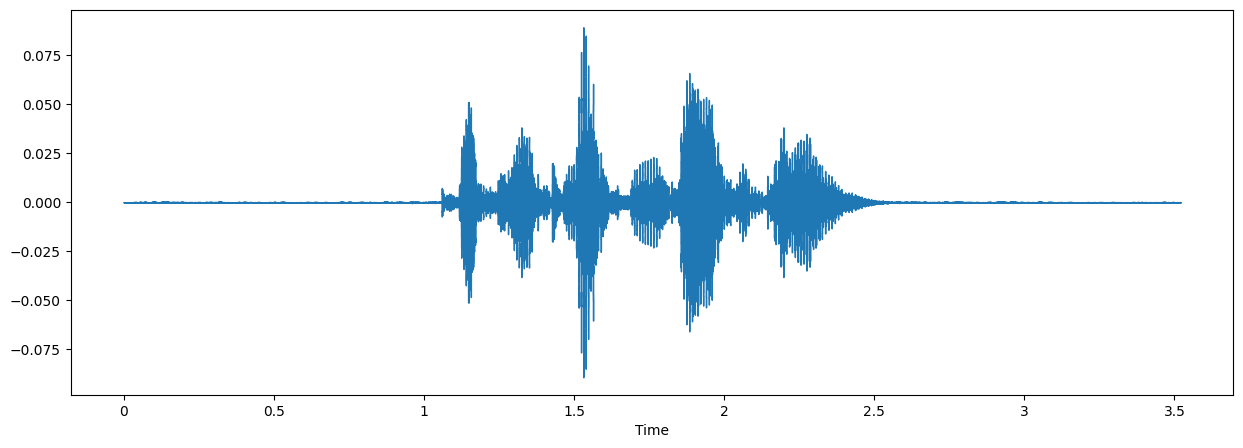

In [ ]:
plot_wave(raw_data_path+'01-01-01-01-01-02-17.wav')


<ipython-input-51-c08b9a775bb8>:27: RuntimeWarning: divide by zero encountered in log
  X[i, :] = np.log(np.abs(z[:nfft//2]))


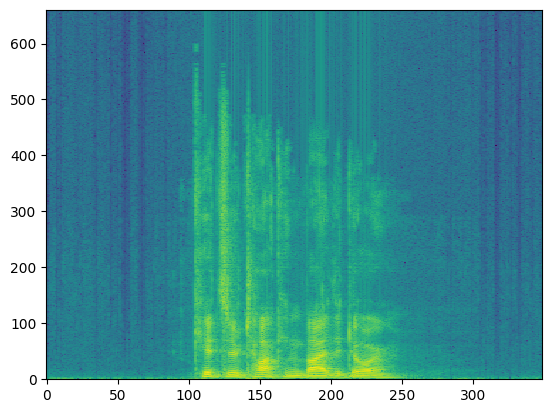

In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np

# Read the WAV file
sr, x = scipy.io.wavfile.read(raw_data_path+'01-01-01-01-01-02-17.wav')

# Check if the audio is stereo (2 channels) and convert to mono if necessary
if len(x.shape) == 2 and x.shape[1] == 2:
    x = x.mean(axis=1)

# Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

# Will take windows x[n1:n2]. Generate and loop over n2 such that all frames fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros((len(nn), nfft//2))

for i, n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i, :] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest', origin='lower', aspect='auto')
plt.show()


## Setting the labels

In [ ]:
mylist = os.listdir(raw_data_path)

In [ ]:
mylist[:5]

['01-01-01-01-01-02-17.wav',
 '01-01-01-01-01-01-17.wav',
 '01-01-01-01-02-01-17.wav',
 '01-01-02-01-01-01-17.wav',
 '01-01-02-01-01-02-17.wav']

In [ ]:
#[6:-16] for emotion, item[18:-4] for gender
#happy 1, neutral 2, calm 3, surprised 4, sad 5, fearful 6, disgust 7, angry 8
feeling_list=[]
for item in mylist:
    gender_emotion = []
    if int(item[18:-4]) % 2 == 0:
        gender_emotion.append(0)
    else:
        gender_emotion.append(1)

    if item[6:-16] == "01":
        gender_emotion.append(2)
    elif item[6:-16] == "02":
        gender_emotion.append(3)
    elif item[6:-16] == "03":
        gender_emotion.append(1)
    elif item[6:-16] == "04":
        gender_emotion.append(5)
    elif item[6:-16] == "05":
        gender_emotion.append(8)
    elif item[6:-16] == "06":
        gender_emotion.append(6)
    elif item[6:-16] == "07":
        gender_emotion.append(7)
    elif item[6:-16] == "08":
        gender_emotion.append(4)
    feeling_list.append(gender_emotion)

In [ ]:
labels = pd.DataFrame(feeling_list)

In [ ]:
labels[:10]

,0,1
0,1,2
1,1,2
2,1,2
3,1,3
4,1,3
5,1,2
6,1,3
7,1,3
8,1,3
9,1,3


## Getting the features of audio files using librosa

In [ ]:
import tensorflow_hub as hub
import soundfile as sf
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [ ]:
# def load_audio(file_path, target_sr=16000):
#     audio, sr = sf.read(file_path)
#     if len(audio.shape) > 1:  # Convert to mono if not
#         audio = np.mean(audio, axis=1)
#     if sr != target_sr:
#         audio = tf.signal.resample(audio, int(target_sr * len(audio) / sr))
#     return audio
def load_audio(file_path, target_sr=16000):
    # Load the file with librosa, which automatically resamples to the target_sr
    audio, sample_rate = librosa.load(raw_data_path+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    return audio

In [ ]:
def add_noise(file_path, noise_level=1e-3):

    flip = np.random.choice([0, 1])
    #print(flip)
    #plot_wave(file_path)
    if flip == 0:

      audio, sr = librosa.load(file_path, sr=None)
      noise = np.random.randn(len(audio))
      augmented_audio = audio + noise_level * noise
      # Ensure that the augmented audio is within the same range as the original audio
      augmented_audio = np.clip(augmented_audio, -1, 1)
    else:

      audio, sr = librosa.load(file_path, sr=None)
      # part = int(len(audio)/10000)
      # noise = np.random.randn(len(audio))
      # start_part = np.random.randint(0, len(audio)-part)
      # audio[start_part:start_part+part] = audio[start_part:start_part+part] * 0
      # augmented_audio = audio
      part = int(len(audio)/50)
      noise = np.random.randn(len(audio))
      start_part = np.random.randint(int(len(audio) / 10), len(audio) - part)
      audio[start_part:start_part+part] = 0
      augmented_audio = np.clip(audio, -1, 1)
    #plot_wave(file_path,augmented_audio,sr)
    #print("============")
    return augmented_audio


In [ ]:
df = pd.DataFrame(columns=['feature'])

noise_num = len(mylist)/10
for index,y in tqdm(enumerate(mylist), total=len(mylist)):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        # X, sample_rate = librosa.load(raw_data_path+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        # sample_rate = np.array(sample_rate)
        # mfccs = np.mean(librosa.feature.mfcc(y=X,
        #                                     sr=sample_rate,
        #                                     n_mfcc=13),
        #                 axis=0)
        # feature = mfccs
        # #[float(i) for i in feature]
        # #feature1=feature[:135]
        # df.loc[bookmark] = [feature]
        # bookmark=bookmark+1
        flip = np.random.choice([0, 1])

        file_path = raw_data_path + y
        # Load and preprocess the audio
        if flip == 1 and noise_num > 0:

          waveform = add_noise(file_path)
          noise_num -= 1
          #waveform = tf.expand_dims(waveform, 0)  # Add batch dimension
        else:

          waveform = load_audio(file_path)

        # Run the model
        scores, embeddings, spectrogram = yamnet_model(waveform)

        # Use embeddings or scores as features
        # Here, we use the mean of embeddings across time as the feature vector
        features = np.mean(embeddings, axis=0)

        # Add to the dataframe
        df.loc[index] = [features]



100%|██████████| 1440/1440 [00:26<00:00, 53.97it/s] 


In [ ]:
df[:5]

,feature
3,"[0.0, 0.38948852, 0.049781334, 0.0, 0.02330764..."
4,"[0.69310397, 0.35415632, 0.406983, 0.042489816..."
6,"[0.57657325, 0.70981985, 0.2824621, 0.03734378..."
7,"[1.0497451, 0.4271816, 0.3768916, 0.094603844,..."
8,"[0.5599042, 0.6845167, 0.35863847, 0.03652784,..."


In [ ]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [ ]:
newdf = pd.concat([df3,labels], axis=1)
newdf.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,0,1
0,0.000000,0.389489,0.049781,0.000000,0.023308,0.000000,0.007249,0.003095,0.009841,0.003243,...,0.000000,0.005888,0.000000,0.000000,0.322127,0.000000,0.022261,0.000000,1,2
1,0.693104,0.354156,0.406983,0.042490,1.013908,1.033990,0.014209,0.975758,0.985229,0.375684,...,1.434864,0.181278,1.759273,0.833684,0.687368,0.259998,0.632992,1.279598,1,2
2,0.576573,0.709820,0.282462,0.037344,0.816938,0.911383,0.017695,0.841951,0.804971,0.331199,...,1.266448,0.150837,1.537907,0.731620,0.628529,0.286998,0.519429,1.130922,1,2
3,1.049745,0.427182,0.376892,0.094604,1.535583,1.365955,0.033519,1.309371,1.436144,0.603332,...,1.890421,0.189518,2.325256,1.119866,0.846473,0.191143,1.154974,1.683340,1,3
4,0.559904,0.684517,0.358638,0.036528,0.762649,0.788311,0.024339,0.787498,0.779583,0.339584,...,1.094333,0.128835,1.349668,0.637402,0.411728,0.257689,0.524296,0.976405,1,3


In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [ ]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,0,1
0,0.000000,0.389489,0.049781,0.000000,0.023308,0.000000,0.007249,0.003095,0.009841,0.003243,...,0.000000,0.005888,0.000000,0.000000,0.322127,0.000000,0.022261,0.000000,1,2
1,0.693104,0.354156,0.406983,0.042490,1.013908,1.033990,0.014209,0.975758,0.985229,0.375684,...,1.434864,0.181278,1.759273,0.833684,0.687368,0.259998,0.632992,1.279598,1,2
2,0.576573,0.709820,0.282462,0.037344,0.816938,0.911383,0.017695,0.841951,0.804971,0.331199,...,1.266448,0.150837,1.537907,0.731620,0.628529,0.286998,0.519429,1.130922,1,2
3,1.049745,0.427182,0.376892,0.094604,1.535583,1.365955,0.033519,1.309371,1.436144,0.603332,...,1.890421,0.189518,2.325256,1.119866,0.846473,0.191143,1.154974,1.683340,1,3
4,0.559904,0.684517,0.358638,0.036528,0.762649,0.788311,0.024339,0.787498,0.779583,0.339584,...,1.094333,0.128835,1.349668,0.637402,0.411728,0.257689,0.524296,0.976405,1,3


In [ ]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,0,1
924,0.446337,0.762104,0.081558,0.030547,0.644834,0.399003,0.027658,0.449916,0.549315,0.248049,...,0.572473,0.053325,0.745652,0.315702,0.339427,0.044310,0.371624,0.499906,0,2
94,0.001815,0.768578,0.074515,0.019822,0.001837,0.000000,0.000606,0.002300,0.009999,0.002092,...,0.000000,0.050655,0.000000,0.000000,0.270538,0.004168,0.004245,0.000000,0,8
1298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8
967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7
1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6
1216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
830,0.425636,1.251137,0.377930,0.056305,0.551035,0.467613,0.040945,0.449401,0.531642,0.224334,...,0.650275,0.037686,0.809452,0.385755,0.268687,0.059841,0.403908,0.580824,0,8
587,0.475606,0.806517,0.235319,0.046945,0.664856,0.601969,0.030973,0.589495,0.649400,0.228617,...,0.834125,0.065687,1.026550,0.491024,0.487665,0.137208,0.476972,0.742347,0,8
604,0.488911,0.269360,0.204844,0.033090,0.763197,0.641205,0.016403,0.583809,0.697195,0.338359,...,0.879139,0.098903,1.052953,0.527778,0.453272,0.213325,0.570674,0.783933,0,7


In [ ]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [ ]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [ ]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,0,1
1333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,4
359,1.190747,0.336757,0.402056,0.121623,1.744937,1.505945,0.024004,1.339033,1.591915,0.658971,...,2.076939,0.157630,2.534247,1.234315,1.107132,0.192678,1.081832,1.850904,0,4
1200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,6
802,0.405236,1.172572,0.179185,0.055767,0.558661,0.545755,0.013809,0.539115,0.562593,0.223997,...,0.766675,0.099105,0.950470,0.441347,0.245710,0.146294,0.315182,0.683779,0,2
1435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,6
593,0.543354,0.911364,0.229837,0.036986,0.693614,0.586368,0.015471,0.612322,0.651332,0.249099,...,0.825005,0.037899,1.060475,0.470394,0.453139,0.238039,0.420233,0.727214,0,8
385,0.311912,0.233173,0.267407,0.037341,0.505679,0.405296,0.003894,0.378722,0.412449,0.159987,...,0.566172,0.110506,0.694842,0.324851,0.389787,0.162405,0.352822,0.500449,1,5
188,0.094254,0.876760,0.484475,0.026663,0.110843,0.031361,0.000700,0.064056,0.092633,0.052737,...,0.050557,0.034515,0.082036,0.026503,0.156944,0.076709,0.069148,0.041307,0,3
827,0.343910,0.863161,0.486092,0.053951,0.470446,0.337642,0.081189,0.336681,0.401280,0.207581,...,0.470678,0.058708,0.587785,0.274061,0.242131,0.103389,0.330797,0.415094,0,5
1055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1


In [ ]:
trainfeatures = train.iloc[:, :-2]
trainfeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
924,0.446337,0.762104,0.081558,0.030547,0.644834,0.399003,0.027658,0.449916,0.549315,0.248049,...,0.134546,0.689416,0.572473,0.053325,0.745652,0.315702,0.339427,0.044310,0.371624,0.499906
94,0.001815,0.768578,0.074515,0.019822,0.001837,0.000000,0.000606,0.002300,0.009999,0.002092,...,0.000000,0.041241,0.000000,0.050655,0.000000,0.000000,0.270538,0.004168,0.004245,0.000000
1298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
830,0.425636,1.251137,0.377930,0.056305,0.551035,0.467613,0.040945,0.449401,0.531642,0.224334,...,0.149432,0.614475,0.650275,0.037686,0.809452,0.385755,0.268687,0.059841,0.403908,0.580824


In [ ]:
trainlabel = train.iloc[:, -2:]
trainlabel.head()

,0,1
924,0,2
94,0,8
1298,0,1
1216,0,4
830,0,8


In [ ]:
testfeatures = test.iloc[:, :-2]

In [ ]:
testlabel = test.iloc[:, -2:]

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

# lb = LabelEncoder()

# # y_train = np_utils.to_categorical(lb.fit_transform(y_train))
# # y_test = np_utils.to_categorical(lb.fit_transform(y_test))
# y_train = to_categorical(lb.fit_transform(y_train))
# y_test = to_categorical(lb.fit_transform(y_test))

gender_labels_train = y_train[:, 0]
emotion_labels_train = y_train[:, 1]
gender_labels_test = y_test[:, 0]
emotion_labels_test = y_test[:, 1]

# Encode gender labels
gender_encoder = LabelEncoder()
gender_labels_train_encoded = gender_encoder.fit_transform(gender_labels_train)
gender_labels_test_encoded = gender_encoder.transform(gender_labels_test)

# Encode emotion labels
emotion_encoder = LabelEncoder()
emotion_labels_train_encoded = emotion_encoder.fit_transform(emotion_labels_train)
emotion_labels_test_encoded = emotion_encoder.transform(emotion_labels_test)

# Convert to categorical
gender_labels_train_categorical = to_categorical(gender_labels_train_encoded)
gender_labels_test_categorical = to_categorical(gender_labels_test_encoded)
emotion_labels_train_categorical = to_categorical(emotion_labels_train_encoded)
emotion_labels_test_categorical = to_categorical(emotion_labels_test_encoded)


In [ ]:
gender_labels_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
emotion_labels_train_categorical

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
gender_labels_test_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [ ]:
emotion_labels_test_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
X_train.shape #(732,1024)
input_n = X_train.shape[1]

In [ ]:
print(X_train)

[[0.4463367  0.76210374 0.08155755 ... 0.04430961 0.3716238  0.499906  ]
 [0.00181503 0.76857775 0.07451506 ... 0.00416803 0.0042448  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.4760871  1.0731086  0.56117326 ... 0.09543652 0.34356144 0.63338387]
 [0.34124258 0.5078955  0.21821448 ... 0.13415591 0.2401801  0.36607328]]


## Changing dimension for CNN model

In [ ]:

x_traincnn =np.expand_dims(X_train, axis=1)
x_testcnn= np.expand_dims(X_test, axis=1)

In [ ]:
print(x_traincnn)

[[[0.4463367  0.76210374 0.08155755 ... 0.04430961 0.3716238  0.499906  ]]

 [[0.00181503 0.76857775 0.07451506 ... 0.00416803 0.0042448  0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]]

 ...

 [[0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.4760871  1.0731086  0.56117326 ... 0.09543652 0.34356144 0.63338387]]

 [[0.34124258 0.5078955  0.21821448 ... 0.13415591 0.2401801  0.36607328]]]


In [ ]:
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(input_n,1),kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
# model.add(Conv1D(256, 5,padding='same',
#                  input_shape=(1024,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = legacy.RMSprop(learning_rate=0.00001, decay=1e-6)


In [ ]:
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LayerNormalization
from tensorflow.keras.regularizers import l1_l2

class multi_lable_model:
  def __init__(self, input_s, hidden_size=256, hidden_size2=128, output_size=8, drop_out=0.2, denseN=10,norm_type="Batch"):
    self.input_shape = input_s
    self.hidden_size = hidden_size
    self.hidden_size2 = hidden_size2
    self.output_size = output_size
    self.drop_out = drop_out
    self.denseN = denseN
    self.norm_type = norm_type
    #self.opt = legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    self.model = self._model_build()

  def _model_build(self):
    input_layer = Input(self.input_shape[1],1)
    x = Conv1D(self.hidden_size, 5, padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(input_layer)
    if self.norm_type == "Batch":
      x = BatchNormalization()(x)
    else:
      x = LayerNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(self.hidden_size2, 5,padding='same')(x)
    x = Activation('relu')(x)
    x = Dropout(0.15)(x)
    x = MaxPooling1D(pool_size=(8))(x)
    x = Conv1D(128, 5, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Flatten()(x)
    gender_out = Dense(2, activation='softmax', name='gender_output')(x)
    emotion_out = Dense(self.output_size, activation='softmax', name='emotion_output')(x)
    model = Model(inputs=input_layer, outputs=[gender_out, emotion_out])
    return model


  def complie(self, lr = 0.00001, decay=1e-6):
    opt = legacy.RMSprop(learning_rate=lr, decay=decay)
    self.model.compile(loss={'gender_output': 'categorical_crossentropy', 'emotion_output': 'categorical_crossentropy'},
                       metrics={'gender_output': ['accuracy'],
                                    'emotion_output': ['accuracy']},optimizer=opt)

  def train(self, x_train, y_train, x_test, y_test, batch_size=20, epochs=300):
    self.model.compile()
    return self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

  def evaluate(self, X_test, y_test):
    return self.model.evaluate(X_test, y_test)

  def summary(self):
    self.model.summary()

  def save(self, model_name, save_dir):
    model_path = os.path.join(save_dir, model_name)
    self.model.save(model_path)


In [ ]:
print(X_train.shape)

(1160, 1024)


In [ ]:
myModel = multi_lable_model(X_train.shape)
print(X_train.shape)
myModel.summary()

ValueError: Input 0 of layer "conv1d_9" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (1, 1024)

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
print(y_test.shape)

(217, 2)


In [ ]:
# y_train_1d = np.argmax(y_train, axis=1)
# y_test_1d = np.argmax(y_test, axis=1)

In [ ]:
# print(y_train_1d.shape)

(729,)


In [ ]:
# cnnhistory=model.fit(x_traincnn, y_train, batch_size=20, epochs=300, validation_data=(x_testcnn, y_test))

In [ ]:
gender_labels_train_categorical = to_categorical(gender_labels_train_encoded)
gender_labels_test_categorical = to_categorical(gender_labels_test_encoded)
emotion_labels_train_categorical = to_categorical(emotion_labels_train_encoded)
emotion_labels_test_categorical = to_categorical(emotion_labels_test_encoded)


In [ ]:
myModel.train(X_train, {'gender_output': gender_labels_train_categorical, 'emotion_output': emotion_labels_train_categorical},
                   X_test, {'gender_output': gender_labels_test_categorical, 'emotion_output': emotion_labels_test_categorical})

Epoch 1/300


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 795, 1024), found shape=(None, 1024)


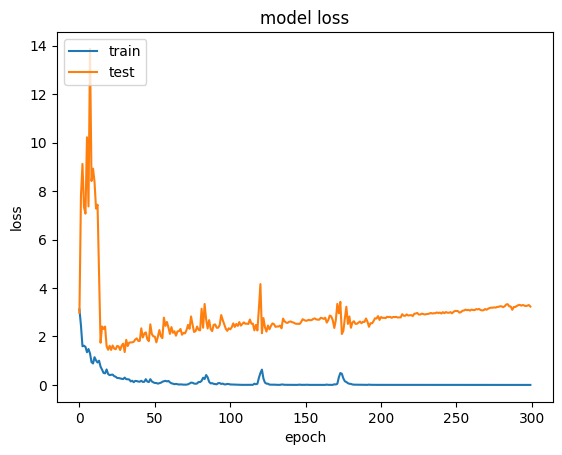

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 56.54%


## Predicting emotions on the test data

In [ ]:
preds = loaded_model.predict(x_testcnn,
                         batch_size=32,
                         verbose=1)

6/6 [==============================] - 0s 3ms/step


In [ ]:
preds

array([[3.0303556e-01, 1.2461642e-14, 1.5526051e-06, ..., 1.2238419e-16,
        9.9489753e-08, 8.7187595e-16],
       [7.6298326e-13, 1.5090490e-13, 5.0030746e-15, ..., 1.7473650e-13,
        9.9992228e-01, 6.2154104e-09],
       [8.2528643e-02, 1.7313097e-15, 2.8536292e-03, ..., 7.2676724e-17,
        2.1617520e-10, 1.6538604e-17],
       ...,
       [4.3253538e-05, 9.3065137e-06, 7.0538974e-01, ..., 3.9760100e-05,
        1.5033277e-06, 5.2168975e-08],
       [5.3418621e-14, 2.1455261e-29, 1.8382395e-16, ..., 3.8428487e-09,
        1.6929291e-09, 1.5503409e-06],
       [9.4709438e-01, 1.9755066e-12, 9.6579432e-05, ..., 6.1370978e-17,
        1.3085603e-06, 4.3162488e-14]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([3, 8, 3, 3, 8, 4, 1, 1, 0, 7, 1, 6, 3, 0, 0, 7, 3, 8, 9, 3, 8, 1,
       9, 4, 2, 4, 4, 0, 6, 3, 1, 0, 9, 7, 4, 8, 2, 2, 1, 5, 8, 6, 5, 1,
       4, 0, 5, 9, 7, 5, 3, 7, 1, 6, 6, 0, 3, 3, 9, 2, 5, 7, 6, 4, 2, 7,
       1, 4, 3, 8, 0, 7, 0, 0, 3, 9, 7, 2, 0, 9, 6, 0, 8, 4, 3, 1, 5, 9,
       6, 5, 0, 9, 4, 1, 3, 0, 0, 1, 6, 7, 0, 1, 6, 2, 8, 5, 7, 2, 4, 8,
       1, 4, 8, 2, 6, 0, 2, 9, 3, 9, 5, 3, 2, 9, 9, 2, 5, 7, 7, 6, 8, 5,
       8, 7, 9, 8, 9, 3, 7, 4, 8, 7, 4, 0, 1, 4, 3, 2, 2, 7, 3, 7, 9, 2,
       3, 5, 8, 8, 2, 6, 6, 4, 8, 4, 5, 3, 1, 7, 2, 7, 5, 9, 7, 3, 7, 7,
       9, 7, 5, 0, 1, 9, 1, 7, 9, 8, 1, 5, 2, 5, 0])

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_happy
1,male_happy
2,female_happy
3,female_happy
4,male_happy
5,female_sad
6,female_calm
7,female_calm
8,female_angry
9,male_fearful


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_angry
1,male_calm
2,female_happy
3,female_fearful
4,male_happy
5,female_sad
6,female_happy
7,female_happy
8,female_happy
9,male_fearful


In [ ]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [ ]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male_angry,male_angry
171,male_sad,male_sad
172,male_calm,male_fearful
173,female_happy,female_happy
174,male_fearful,male_fearful
175,male_fearful,male_fearful
176,male_calm,male_sad
177,male_fearful,male_fearful
178,male_angry,male_fearful
179,female_angry,female_fearful


In [ ]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,13
female_calm,16
female_fearful,24
female_happy,26
female_sad,16
male_angry,22
male_calm,16
male_fearful,19
male_happy,20


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,22
female_calm,26
female_fearful,17
female_happy,19
female_sad,12
male_angry,14
male_calm,19
male_fearful,29
male_happy,19


In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [ ]:
data, sampling_rate = librosa.load(raw_data_path+'03-02-04-02-02-02-01.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['flip', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


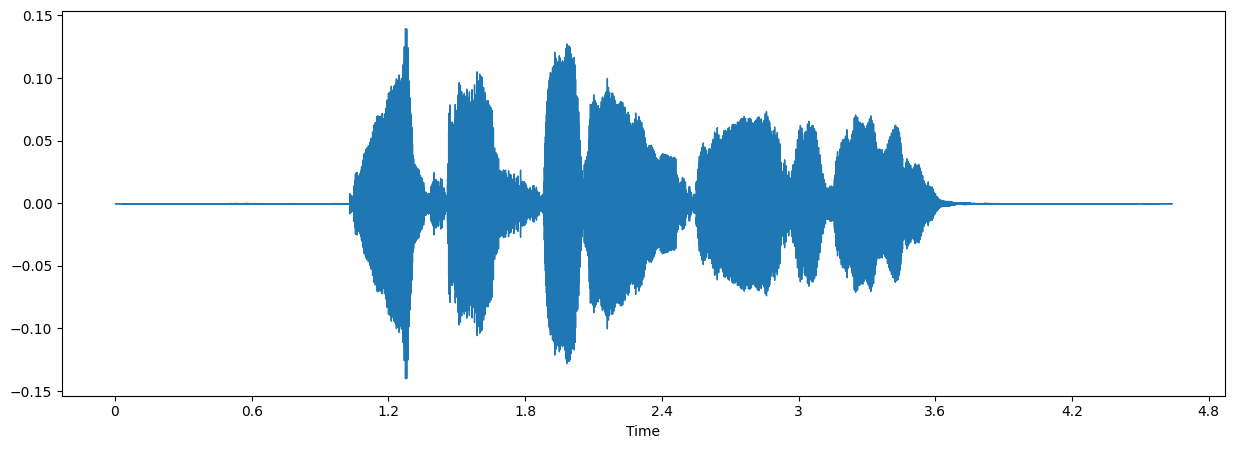

In [ ]:
%pylab inline
import os
import pandas as pd
import librosa
import glob

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [ ]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load(raw_data_path+'03-02-04-02-02-02-01.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [ ]:
livedf2= pd.DataFrame(data=livedf2)

In [ ]:
livedf2 = livedf2.stack().to_frame().T

In [ ]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-55.948711,-54.883018,-53.730881,-54.967442,-55.588253,-55.50922,-56.15873,-56.794781,-56.513817,-54.981228,...,-27.08984,-27.64814,-26.568636,-24.613565,-26.470184,-28.941536,-30.184883,-28.480429,-18.474657,-12.921136


In [ ]:
twodim= np.expand_dims(livedf2, axis=2)

In [ ]:
livepreds = loaded_model.predict(twodim,
                         batch_size=32,
                         verbose=1)

InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-74-4da89f3c7068>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 241, in call

Matrix size-incompatible: In[0]: [1,3456], In[1]: [16384,10]
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_predict_function_88114]

In [ ]:
livepreds

array([[6.6849439e-05, 1.3292721e-04, 5.8912439e-09, 9.2902937e-06,
        8.0179361e-06, 1.2886931e-02, 2.8285167e-01, 1.3211875e-02,
        5.7477511e-02, 6.3335496e-01]], dtype=float32)

In [ ]:
livepreds1=livepreds.argmax(axis=1)

In [ ]:
liveabc = livepreds1.astype(int).flatten()

In [ ]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_sad'], dtype=object)